In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.duplicated().sum()

0

In [5]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber',"CustomerId","Surname"],inplace=True)


In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:

df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True,dtype=int)

In [11]:
X=df.drop(columns=["Exited"])
y=df.Exited

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:

from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()

X_train_scaled=scaled.fit_transform(X_train)
X_test_scaled=scaled.transform(X_test)

In [14]:
X_train_scaled


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-06-05 15:13:05.155426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 15:13:05.155528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 15:13:05.326673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:

model=Sequential()


model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [18]:

history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
106/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2051 - loss: 1.3365

I0000 00:00:1717600399.661389     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717600399.676407     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2046 - loss: 1.2951 - val_accuracy: 0.2025 - val_loss: 1.0588
Epoch 2/100
 68/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2004 - loss: 1.0400

W0000 00:00:1717600400.347665     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2003 - loss: 0.9976 - val_accuracy: 0.2144 - val_loss: 0.8423
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2569 - loss: 0.7989 - val_accuracy: 0.4694 - val_loss: 0.7074
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 0.6824 - val_accuracy: 0.7944 - val_loss: 0.6255
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.6114 - val_accuracy: 0.7994 - val_loss: 0.5761
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.5651 - val_accuracy: 0.7975 - val_loss: 0.5460
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.5364 - val_accuracy: 0.7975 - val_loss: 0.5272
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.5233 - val_accuracy: 0.7975 - val_loss: 0.5150
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.5176 - val_accuracy: 0.7975

In [19]:
model.layers[0].get_weights()

[array([[ 0.122187  ,  0.01685633, -0.04304522],
        [-3.5986047 ,  0.2215409 , -0.33065927],
        [-0.02498602, -0.0541321 , -0.13854675],
        [-0.27118072,  0.9094516 , -1.111611  ],
        [-0.593579  ,  1.0565052 , -3.0357585 ],
        [-0.08972887, -0.14743   , -0.08731508],
        [-0.59998125, -1.3961757 , -0.6341166 ],
        [ 0.15419228,  0.0336966 ,  0.15841182],
        [ 0.03423729,  0.2526472 ,  0.8611213 ],
        [-0.02253806,  0.22524615, -0.08204714],
        [ 0.02965781, -0.64266443, -0.05323942]], dtype=float32),
 array([ 0.77115  , -1.1413823, -1.9215335], dtype=float32)]

In [20]:
model.layers[1].get_weights()


[array([[-2.6040955],
        [ 2.0182695],
        [ 2.4480512]], dtype=float32),
 array([-1.5513645], dtype=float32)]

In [21]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [22]:
y_pred=np.where(y_log>0.5,1,0)

In [23]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8505

In [24]:
import matplotlib.pyplot as plt 
history.history

{'accuracy': [0.20281249284744263,
  0.20421874523162842,
  0.3153125047683716,
  0.6600000262260437,
  0.7990624904632568,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7970312237739563,
  0.800000011920929,
  0.803906261920929,
  0.8079687356948853,
  0.8115624785423279,
  0.8135937452316284,
  0.8154687285423279,
  0.8170312643051147,
  0.8165624737739563,
  0.8167187571525574,
  0.8196874856948853,
  0.819531261920929,
  0.8206250071525574,
  0.8218749761581421,
  0.8228124976158142,
  0.8237500190734863,
  0.8246874809265137,
  0.8251562714576721,
  0.8267187476158142,
  0.8267187476158142,
  0.828125,
  0.8282812237739563,
  0.8287500143051147,
  0.8293750286102295,
  0.8295312523841858,
  0.8303124904632568,
  0.83046

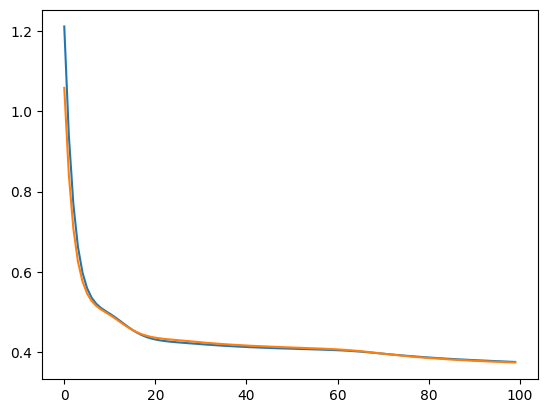

In [25]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])